### **Feature Engineering & Data Pre-Processing (Özellik Mühendisliği-Veri Ön İşleme )**

**Özellik Mühendisliği**

* Özellikler üzerinde gerçekleştirilen çalışmalar. Ham veriden değişkenler üretmek.

**Veri Ön İşleme** 

* Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir. 





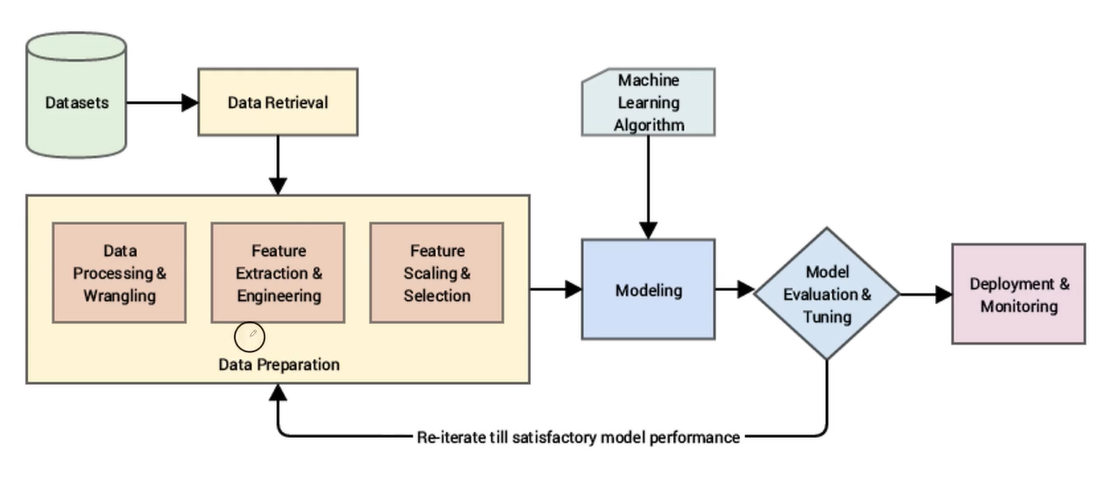

#### **Aykırı Değerler Nasıl Yakalanır?**

* Sektör Bilgisi 

* Standart Sapma Yaklaşımı

* Z-Skoru Yaklaşımı

* Boxplot (interquantile range IQR) Yöntemi

* LOF

#### **Kütüphaneler**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


* **Missingno, eksik verilerin varlığını ve dağılımını anlamak için bir dizi görselleştirme sağlayan mükemmel ve kullanımı kolay bir Python kütüphanesidir. Bu, bir barplot, matris grafiği, ısı haritası veya bir dendrogram şeklinde olabilir.**

In [2]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import missingno as missingno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

#### **Veri Setinin Yüklenmesi**

In [4]:
def load_application_train():
    data = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/feature_engineering/datasets/titanic.csv")
    return data

df = load_application_train()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### **Outliers (Aykırı Değerler)**

* Verideki genel eğilimin oldukça dışına çıkan değerlere aykırı değer denir.


#### **Grafik ile Aykırı Değer Gözlemi**


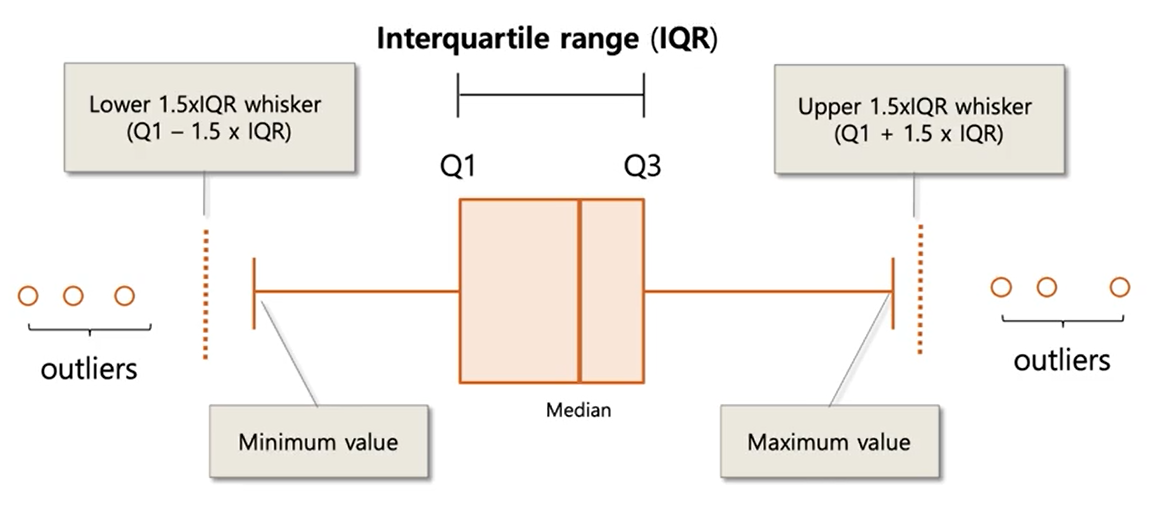

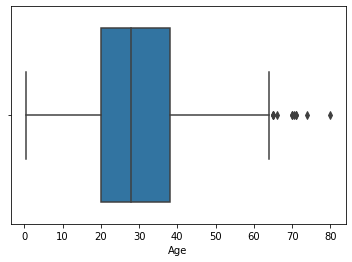

In [5]:
# Age değişkenindeki aykırı değerleri boxplot yardımıyla gözlemleyelim.
sns.boxplot(x = df["Age"])
plt.show()

* Sağ taraftaki gözlemler aykırı değerlerin var olduğunu gösterir.

In [6]:
# Aykırı değerlerin aralıklarını kendimiz gözlemlemek istersek aşağıdaki gibi yapabiliriz. 

q1 = df["Age"].quantile(0.25)
print("q1 :", q1)
q3 = df["Age"].quantile(0.75)
print("q3 :", q3)

iqr = q3 - q1
print("iqr :", iqr)

up = q3 + 1.5 * iqr
print("up :", up)
low  = q1 - 1.5 * iqr
print("low :", low)

q1 : 20.125
q3 : 38.0
iqr : 17.875
up : 64.8125
low : -6.6875


In [7]:
df[(df["Age"] < low) | (df["Age"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


In [8]:
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

### **Aykırı Değer Gözlemi**

In [9]:
df[(df["Age"] < low) | (df["Age"] > up)].any(axis = None)

# "any" içinde herhangi bir değer var mı ile ilgilenir.

True

In [10]:
df[~((df["Age"] < low) | (df["Age"] > up))].head()

# Yukarıdaki çıktıya göre aykırı değer var, dolayısıyla bunlar haricindekiler alınmalıdır.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [11]:
df[~((df["Age"] < low) | (df["Age"] > up))].any(axis = None) 

# içinde herhangi bir değer var mı yok mu 
# yani gözlem ile ilgilendiği için aykırı değer var olduğu için True dönüyor.

True

In [12]:
df[df["Age"] < low].any(axis=None) 

# negatif bir değer var mı diye soruyorsun, False dönüyor. 

False

**1. İlk önce eşik değer belirlendi.**

**2. Aykırı değerlere erişildi.**

**3. Hızlıca aykırı değer var mı yok mu sorgusu yapıldı.**

### **İşlemlerin Fonksiyonlaştırılması**

In [13]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [14]:
outlier_thresholds(df, "Fare")

(-26.724, 65.6344)

In [15]:
low, up = outlier_thresholds(df, "Fare")

df[(df["Fare"] < low) | (df["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [16]:
df[(df["Fare"] < low) | (df["Fare"] > up)].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "Age")

# outlier var mı? yok mu? kontrol eden fonksiyon

True

In [18]:
check_outlier(df, "Fare")

True

### **!!! grab_col_names !!!** 

* Bu fonksiyon veri seti içindeki kategorik, nümerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

* Kategorik görünümlü olup çok fazla sınıfa sahip değişkenler vardır. Kardinalliği yüksek değişkenler yani kategorik görünümlü anlamlı bilgi taşımayan değişkenler...

**Not: Kategorik değişkenlerin içerisine nümerik görünümlü kategorik değişkenler de dahildir.**

grab_col_names ifade edilen problemleri genelleştirilerir. Belirli eşik değerleri ile kategorik gibi gözüken kardinalleri, nümerik gözüken kategorik değişkenleri, gözlem değerlerini, kategorik ve nümerik değişkenleri ayrı ayrı yakalamak için yazılmıştır. 

In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  
#  cat_th=10 ve  car_th=20 seçmek tamamen opsiyonel. !
#  eğer cat_th = 10 bir değişkenin içindeki sınıf sayısı 10 dan azsa bu aslında sayısal görünümlü kategorik değişken olabilir.
#  car_th=20 eğer bir kategorik değişkenin 20 den fazla sınıfı varsa ve tipide object ise kategorik görünümlü kardinal olabilir.
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

# num_cols

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
    print(col, check_outlier(df, col))


Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True


In [20]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [21]:
num_cols

['Age', 'Fare']

In [22]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [23]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

for col in num_cols:
    print(col, check_outlier(df, col))

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
PassengerId False
Age True
Fare True


In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [25]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [27]:
for col in num_cols:
    print(col, check_outlier(df, col))

PassengerId False
Age True
Fare True


In [28]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [29]:
num_cols

['PassengerId', 'Age', 'Fare']

### **Aykırı Değerlerin Kendilerine Erişmek**

Aşağıdaki fonksiyonlaştırılmış olan kod, aykırı değer sayısı eğer 10 dan büyükse, aykırı değere head atsın, değilse bütün veri setini getirsin.

In [30]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "Age")


     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


**Sonuç olarak aykırı değerleri aşağıdaki 3 kod yardımıyla yakalıyoruz.**

In [31]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [32]:
check_outlier(df, "Age")

True

In [33]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

### **Aykırı Değer Problemini Çözme**

#### **Silme Yöntemi**

In [34]:
low, up = outlier_thresholds(df, "Fare")
df.shape

(891, 12)

In [35]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape

(775, 12)

In [36]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [37]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [38]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

df.shape

(891, 12)

In [39]:
for col in num_cols:
    new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0]

116

116 gözlem birimi silindi.

#### **Baskılama Yöntemi (re-assignment with thresholds)**

* Silindiğinde istenmeyen bir şekilde veri kaybı olabilir. Bu yüzden **baskılama yöntemi** uygulanabilir.

In [40]:
low, up = outlier_thresholds(df, "Fare")

df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"].head()

1     71.283
27   263.000
31   146.521
34    82.171
52    76.729
Name: Fare, dtype: float64

In [41]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"].head()

1     71.283
27   263.000
31   146.521
34    82.171
52    76.729
Name: Fare, dtype: float64

In [42]:
df.loc[(df["Fare"] > up), "Fare"] = up

df.loc[(df["Fare"] < low), "Fare"] = low

In [43]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [44]:
def load_application_train():
    data = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/feature_engineering/datasets/titanic.csv")
    return data

df = load_application_train()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [45]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

df.shape

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


(891, 12)

In [46]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [47]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [48]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


### **Recap**

In [49]:
# İşlem görmemiş veri seti yüklenir.

df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/feature_engineering/datasets/titanic.csv") 

#SAPTAMA İŞLEMLERİ

outlier_thresholds(df, "Age") # aykırı değeri saptama işini yapar eşik değeri belirlenir **ÖNEMLİ 1
check_outlier(df, "Age")  # belirlenen eşik değerine göre outlier var mı yok mu sorusunu sorduk
grab_outliers(df, "Age", index=True) #outlierları bize getir dedik 
 
# TEDAVİ YÖNTEMLERİ

remove_outlier(df, "Age").shape    #outlierları silmek 
replace_with_thresholds(df, "Age") #outlierları baskıla **ÖNEMLİ 2
check_outlier(df, "Age")   #outlierları tekrar gözlemle, aykırı değerlerden kurtulduk.

# ÖNEMLİ 3 grab_col_names fonksiyonudur.

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


False

### **Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor**

* Elimizde iki değişken olsun, biri yaş biri de evlilik sayısı. Evlilik sayısı 3 olduğunda bu normal karşılanır. Yaş 17 olsun tek başına burada da sorun yoktur. Ama 17 yaşında 3 defa evlenmiş olmak sorundur. **Anormali** bir durum söz konusudur. 

* Tek başına anlamlı olan yapılar çok değişkenli incelendiğinde anlamsız hale gelebilmektedir. Ya da tam tersi tek başına anlamsız iken çok değişkenli incelendiğinde anlamlılık kazanabilir.


### **Local Outlier Factor (LOF YÖNTEMİ)** 

* Çok değişkenli bir aykırı değer belirleme yöntemidir. 

* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımamıza imkanı sağlar.

* Local yoğunluk, ilgili komşulukların yoğunluğu demektir.

**Not:** Yoğunluk komşularınınkinden anlamlı bir düzeyde düşükse bu nokta daha seyrek bir bölgededir. Yani bu aykırı değerdir yorumu yapılabilir. 

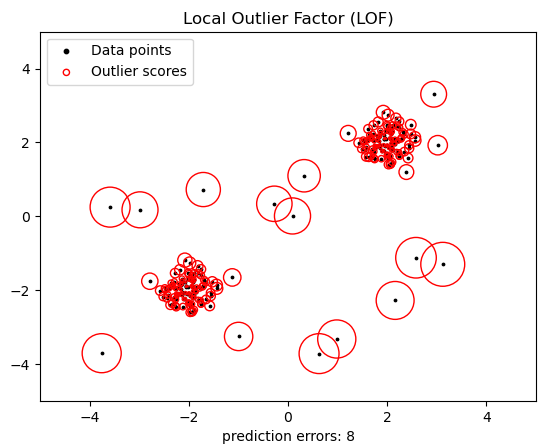

**Görsel :** https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

**Inlier :** LOF der ki ben size bir skor vereceğim.

1.   Benden aldığınız skor 1'e ne kadar yakınsa o kadar iyidir **INLIER**. 
2.   1'den ne kadar uzaksa ilgili *gözlemin* artık **OUTLIER** olması artıyor demektir. 

Inlier ya da outlier problemi bir threshold belirlenerek çözülebilir.


In [50]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [51]:
for col in df.columns:
  print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [52]:
low, up = outlier_thresholds(df, "carat")
df[(( df["carat"] < low) | (df["carat"] > up))].shape

(1889, 7)

In [53]:
low, up = outlier_thresholds(df, "depth")
df[(( df["depth"] < low) | (df["depth"] > up))].shape

(2545, 7)

$\star$ Tek başına bakıldığında çok yüksek sayıda aykırılıklar geldi. Bunları silme ya da baskılama yaparsan gürültü eklemiş olursun. Ya da eşik değerlerini 0.25 e 0.75 almak yerine 0.5 e 0.95 almayı tercih edebilirsin.

In [54]:
clf = LocalOutlierFactor(n_neighbors= 20) 
clf.fit_predict(df)

#20 sayısını değiştirebilirsin. Fakat ön tanımlı değeri 20 dir. Bunu tercih edebilirsin :)

array([-1, -1, -1, ...,  1,  1,  1])

In [55]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]

#eksi değerlere göre değerlendirme yapabilirsin.

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [56]:
# yok ben eksi değerler olarak gözüksün istemiyorum dersen:

df_scores = -df_scores
df_scores[0:5]

array([1.58352526, 1.59732899, 1.62278873, 1.33002541, 1.30712521])

In [57]:
# elbow yönteminde daha rahat okunabilirlik açısından negatif değerlerle okumayı tercih etmelisin.
# değerler negatif olduğu için -1 e yakın olan inlier değer olacak !

df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

* Outlierdaki problemimiz eşik değerini belirleme problemiydi. Bunu da elbow yöntemiyle yapabilirsin.

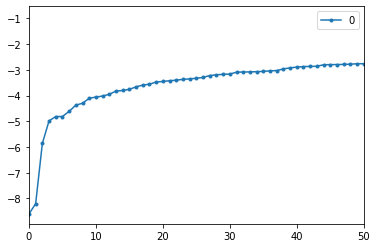

In [58]:
# elbow yöntemi ile eşik değeri belirleme
# kırıldığı nokta itibariyle alabilirim -4 civarında.

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [59]:
th = np.sort(df_scores)[3]
th

-4.984151747711709

In [60]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [61]:
df[df_scores < th].shape

(3, 7)

In [62]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T


,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


In [63]:
df[df_scores < th].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [64]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z


**ÖZET**

* Eğer çok fazla outlier değer varsa silmek ve baskılamak gürültüye neden olacağından outlier_th ve replace_th ile gözlemlere kendi içinde yaklaşacaksın. Çok ucundan traşlayacaksın bütüne dokunmayacaksın.

* Gözlem sayısı çok olduğunda baskılama yapmak çok mantıklı olmayacaktır.

* Gözlem sayısı azsa ve çok değişkenli ise veri setinden o aykırılıklar çıkarılmalıdır.

* Ağaç yöntemi kullanıyorsan aykırı değerlere hiç dokunmamalısın fakat ille de dokunmak istiyorsan çok ucundan veriye zarar vermeden dokunmalısın. IQR hesaplıcaksın 99-1 ya da 95-5 lik değerleri tercih etmelisin.

* Doğrusal yöntemler kullanılıyorsa outlierları ya silmelisin ya da baskılama yapmalısın ama yine çok ucundan yapmalısın. Veri bütünlüğünü kaybetmesin.